In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r"C:\Users\PC\Desktop\Machine Learning\Datasets")

In [3]:
data = pd.read_csv("car_evaluation.csv")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
data.shape

(1727, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
# check missing values in variables

data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
# check missing values in variables

data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
X = data.drop(['class'], axis=1)
y = data['class']

In [11]:
X = pd.get_dummies(X, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X.head()
X.columns

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')

In [12]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Sample categorical data


# Fit and transform the data
y = label_encoder.fit_transform(y)

print("Original categories:", y)
print("Encoded data:", y)

Original categories: [2 2 2 ... 2 1 3]
Encoded data: [2 2 2 ... 2 1 3]


In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 21), (570, 21))

In [48]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=10, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=0)

In [49]:
y_pred_gini = clf_gini.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8404


In [51]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 2, 2, ..., 2, 2, 2])

In [52]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8600


In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8600
Test set score: 0.8404


[Text(0.625, 0.9166666666666666, 'x[19] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5625, 0.75, 'x[12] <= 0.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.5, 0.5833333333333334, 'x[7] <= 0.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.25, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.63\nsamples = 399\nvalue = [214, 51, 95, 39]'),
 Text(0.125, 0.25, 'x[17] <= 0.5\ngini = 0.552\nsamples = 306\nvalue = [182, 16, 91, 17]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.482\nsamples = 202\nvalue = [140, 12, 33, 17]'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.524\nsamples = 104\nvalue = [42, 4, 58, 0]'),
 Text(0.375, 0.25, 'x[4] <= 0.5\ngini = 0.682\nsamples = 93\nvalue = [32, 35, 4, 22]'),
 Text(0.3125, 0.08333333333333333, 'gini = 0.626\nsamples = 66\nvalue = [13, 35, 3, 15]'),
 Text(0.4375, 0.08333333333333333, 'gini = 0.436\nsamples = 27\nvalue = [19, 0, 1, 7]'),
 Text(0.75, 0.4166666666666667, 'x[1] <= 0.5\ng

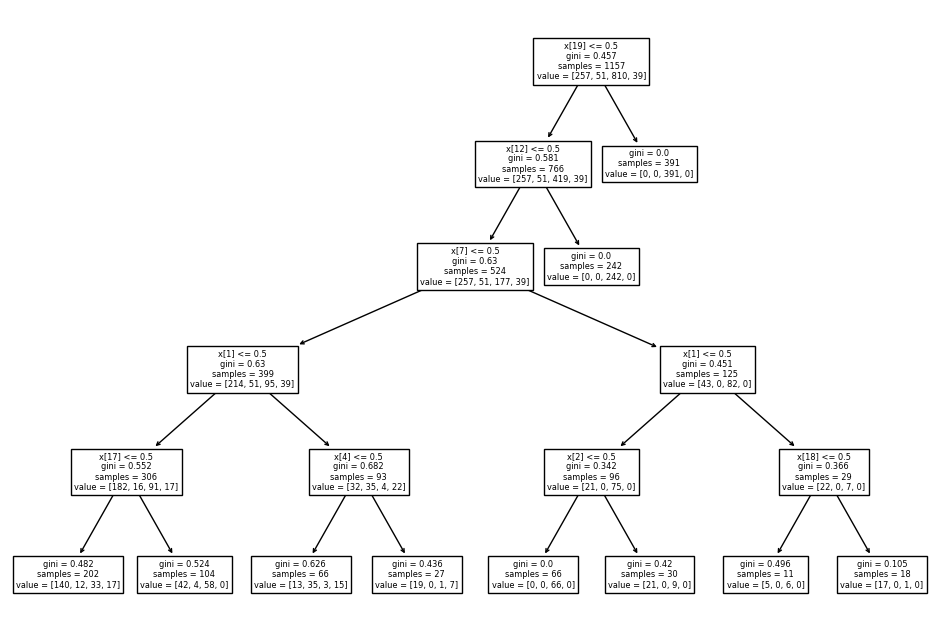

In [54]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

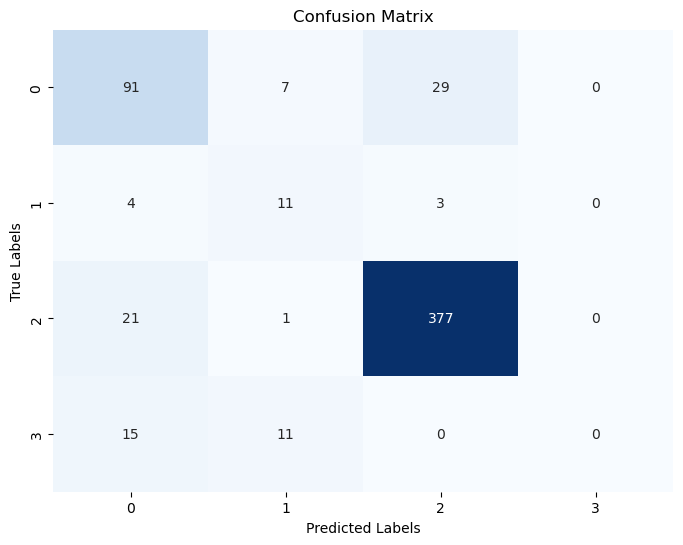

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gini)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

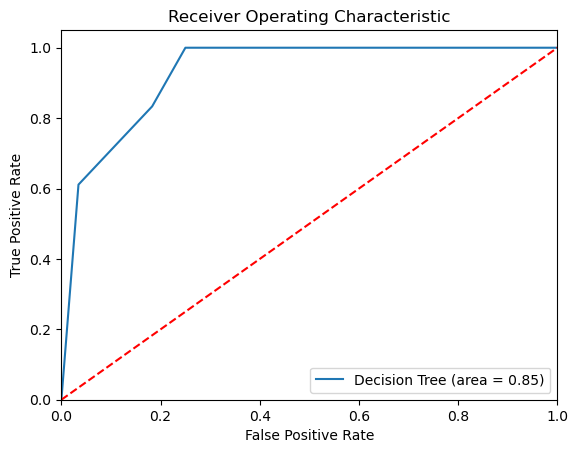

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming clf_gini is a DecisionTreeClassifier
# Make sure to replace it with your actual classifier

# Calculate ROC AUC for a multi-class problem
DT_roc_auc = roc_auc_score(y_test, clf_gini.predict_proba(X_test), multi_class='ovo')

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, clf_gini.predict_proba(X_test)[:, 1], pos_label=1)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [57]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [58]:
import graphviz

In [59]:
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=X_train.columns,
                                class_names=y_train, filled=True,
                                rounded=True, special_characters=True)

graph = graphviz.sources.Source(dot_data) 

graph

TypeError: can only concatenate str (not "numpy.int32") to str